# <p style="background-color:#e36288; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">DBSCAN Clustering Project: Wholesale Customers</p>


<div class="alert alert-block alert-info alert">

## <span style=" color:#bf2e98">About the Dataset

Source: https://archive.ics.uci.edu/ml/datasets/Wholesale+customers

Margarida G. M. S. Cardoso, margarida.cardoso '@' iscte.pt, ISCTE-IUL, Lisbon, Portugal


**Data:**

    1) FRESH: annual spending (m.u.) on fresh products (Continuous);
    2) MILK: annual spending (m.u.) on milk products (Continuous);
    3) GROCERY: annual spending (m.u.)on grocery products (Continuous);
    4) FROZEN: annual spending (m.u.)on frozen products (Continuous)
    5) DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous)
    6) DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous);
    7) CHANNEL: customers  Channel - Horeca (Hotel/Restaurant/CafÃ©) or Retail channel (Nominal)
    8) REGION: customers  Region Lisnon, Oporto or Other (Nominal)
</div>

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Exploratory Data Analysis

**Read the data and see the dataframe.**

In [2]:
df = pd.read_csv('wholesome_customers_data.csv')

In [3]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


**Create a scatterplot showing the relation between MILK and GROCERY spending, colored by Channel column.**

<Axes: xlabel='Milk', ylabel='Grocery'>

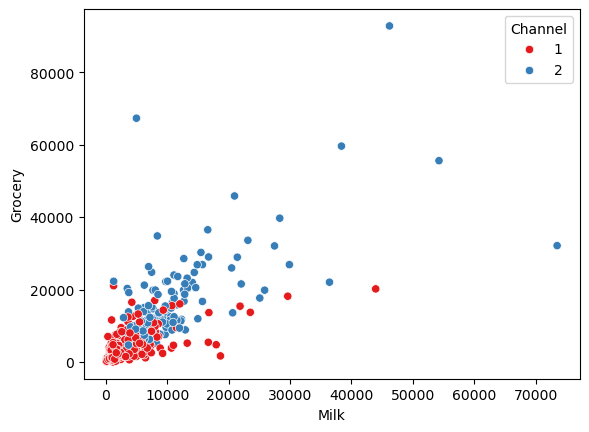

In [5]:
sns. scatterplot(df, x="Milk", y="Grocery", hue="Channel", palette="Set1")

<div class="alert alert-warning alert-info">
    
<span style=" color:#bf2e98"> 

**Insight:** Compared to Channel 1 customers, Channel 2 customers spend more for Grocery and Milk.
</span>

**Create a histogram of MILK spending, colored by Channel.**

<Axes: xlabel='Milk', ylabel='Count'>

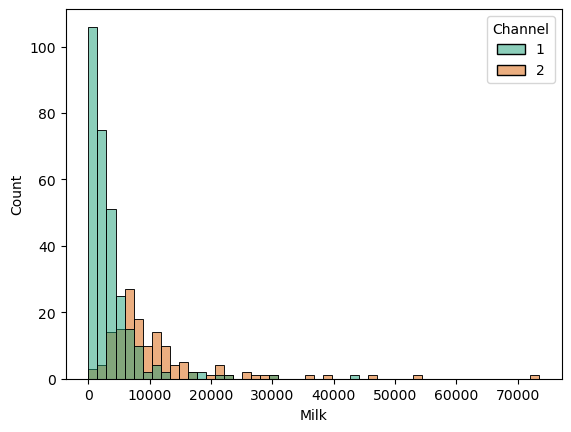

In [6]:
# overlapping version of the histogram
sns.histplot(df, x="Milk",hue="Channel", palette="Dark2")

<Axes: xlabel='Milk', ylabel='Count'>

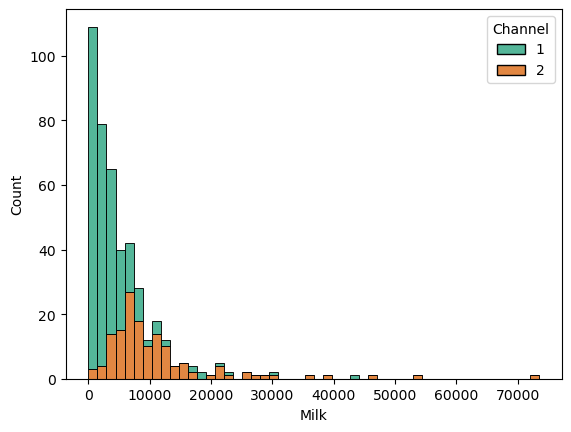

In [7]:
# stacked version 
sns.histplot(df, x="Milk",hue="Channel", palette="Dark2", multiple="stack")

**Create an annotated clustermap of the correlations between spending on different cateogires.**

Correlation Between Spending Categories


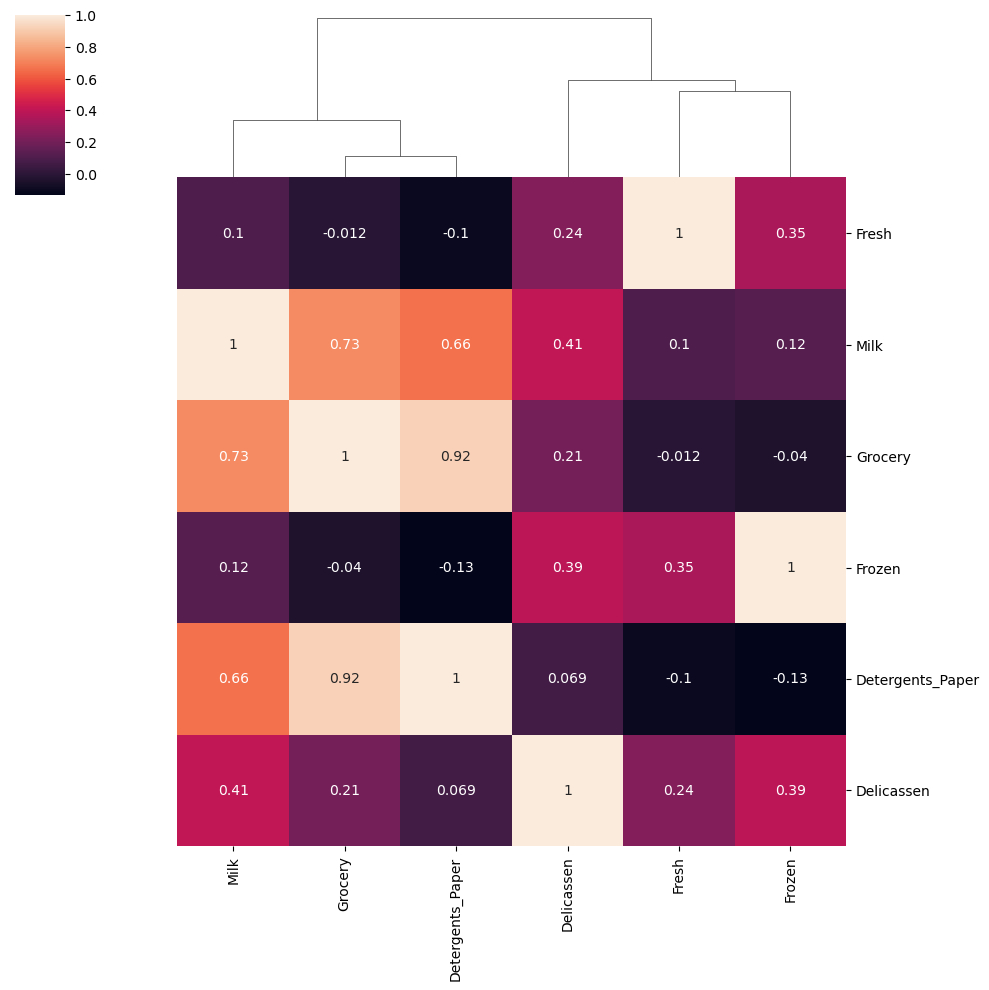

In [8]:
# drop "Region" and "Channel" columns in this correlation

print('Correlation Between Spending Categories')
sns.clustermap(df.drop(["Region", "Channel"], axis=1).corr(), annot=True, row_cluster=False);

# Since clusters of the rows and the columns are the same in this example, no need to display both

<div class="alert alert-warning alert-info">
    
<span style=" color:#bf2e98"> 

**Insight:** There is a high correlation between Grocery, Detergents Paper and Milk. On the other hand, there is some correlation between Fresh and Frozen. To understand the extent of the correlation, look at the length of the cluster lines at the top of the table (how close / how far to the table).
</span>

**Create a PairPlot of the dataframe, colored by Region.**

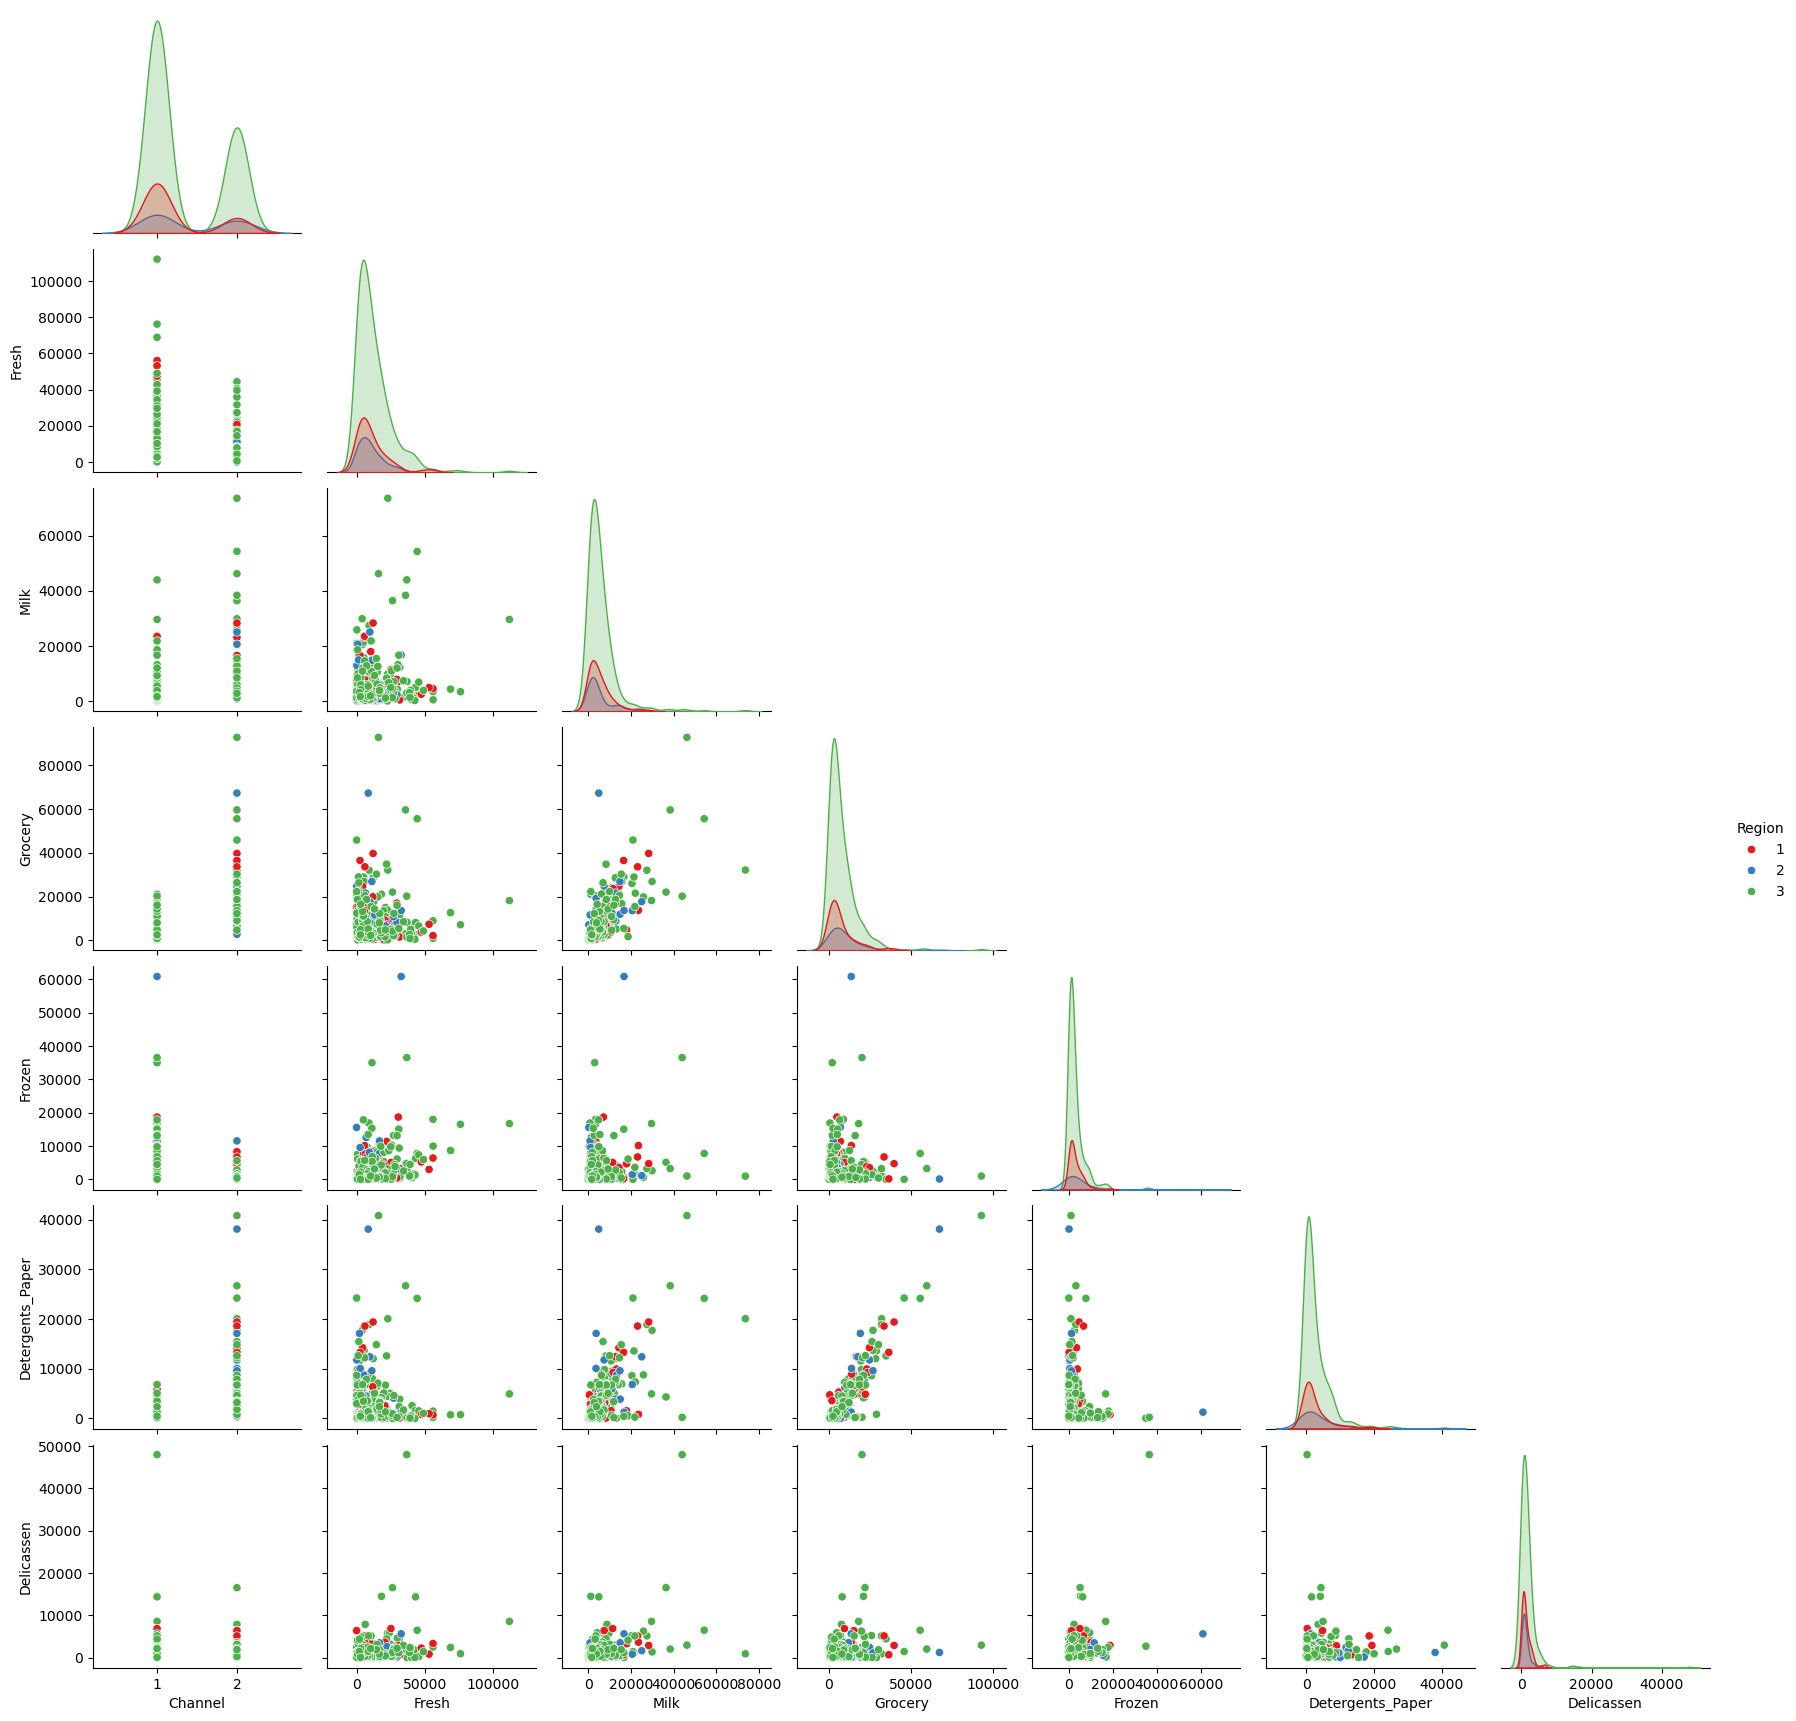

In [9]:
sns.pairplot(df, hue="Region", palette="Set1", corner=True);

**PairPlot according to Channel.**

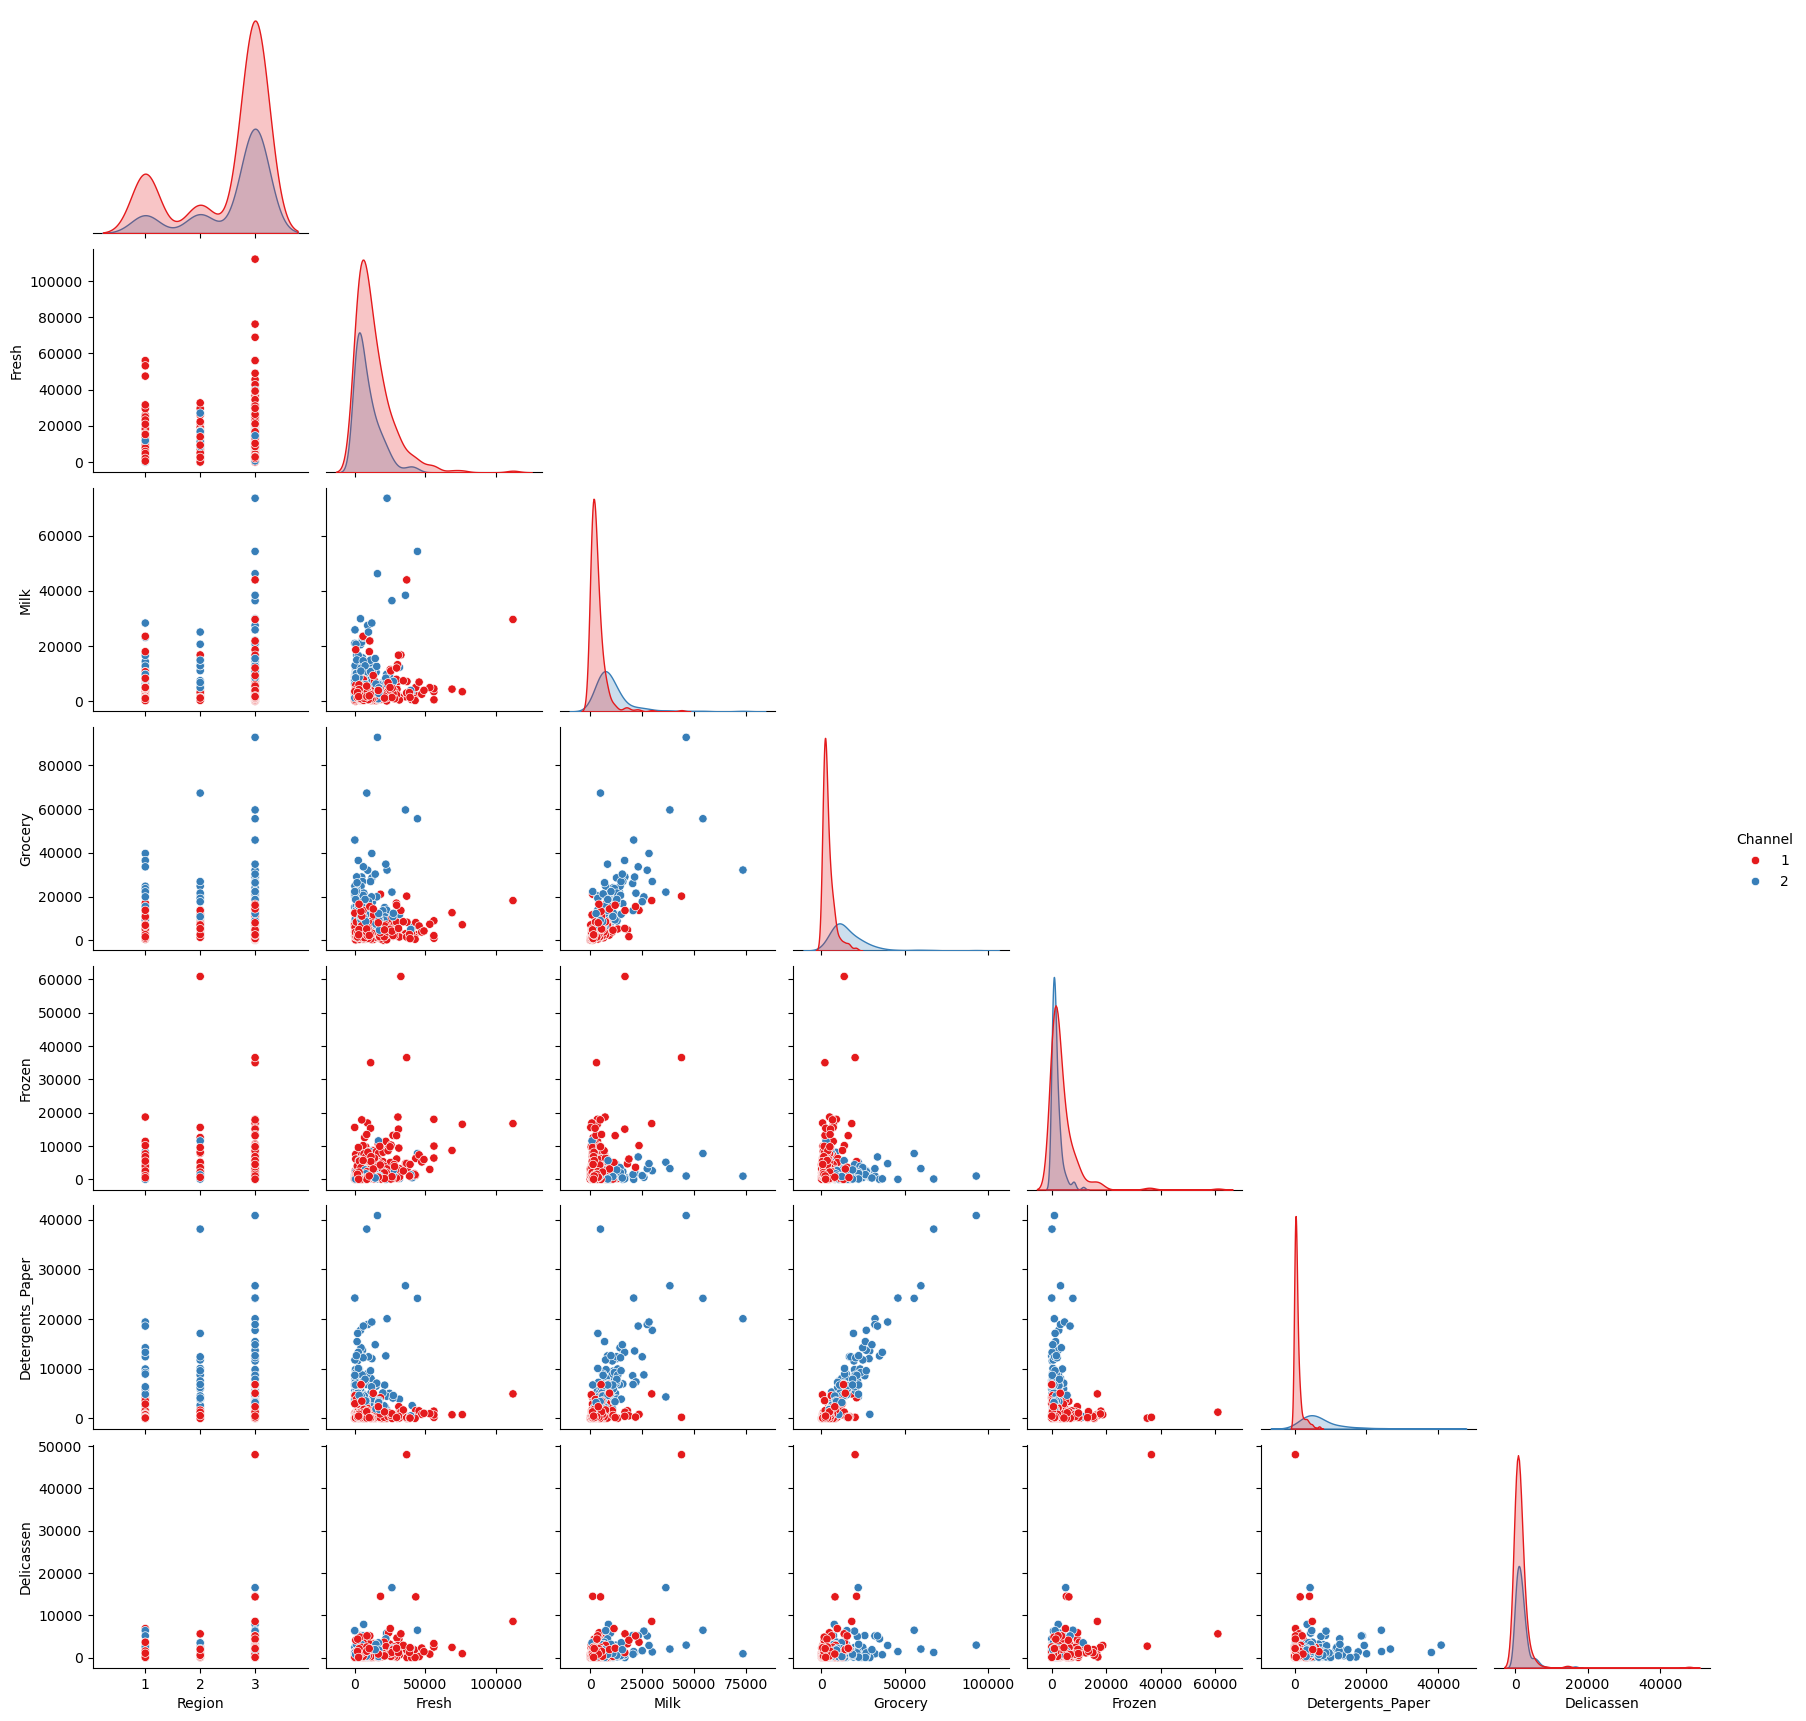

In [10]:
sns.pairplot(df, hue="Channel", palette="Set1", corner=True);

## DBSCAN

**Since the values of the features are in different orders of magnitude, let's scale the data using StandardScaler.**

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler = StandardScaler()

In [13]:
scaled_X = scaler.fit_transform(df)

# We could use dummy variables before scaling.
# Since the categories in columns are not much, we did not prefer this way

In [14]:
scaled_X

array([[ 1.44865163,  0.59066829,  0.05293319, ..., -0.58936716,
        -0.04356873, -0.06633906],
       [ 1.44865163,  0.59066829, -0.39130197, ..., -0.27013618,
         0.08640684,  0.08915105],
       [ 1.44865163,  0.59066829, -0.44702926, ..., -0.13753572,
         0.13323164,  2.24329255],
       ...,
       [ 1.44865163,  0.59066829,  0.20032554, ..., -0.54337975,
         2.51121768,  0.12145607],
       [-0.69029709,  0.59066829, -0.13538389, ..., -0.41944059,
        -0.56977032,  0.21304614],
       [-0.69029709,  0.59066829, -0.72930698, ..., -0.62009417,
        -0.50488752, -0.52286938]])

**Use DBSCAN and a "for loop" to create a variety of models testing different epsilon values.** 

**Set min_samples equal to 2 times the number of features.**

**During the loop, keep track of and log the percentage of points that are outliers.** 

**Use the following range of epsilon values for testing:**

    np.linspace(0.001,3,50)

In [15]:
from sklearn.cluster import DBSCAN

In [16]:
# Number of features 
scaled_X.shape[1]

8

In [17]:
# For loop for the variety of models
outlier_percent = []

for eps in np.linspace(0.001, 3, 50):
    dbscan = DBSCAN(eps=eps, min_samples=2*scaled_X.shape[1]) # 2 times the number of features
    dbscan.fit(scaled_X)

    # percentage of outliers ("-1" category represents outliers)
    percent_outliers = 100*np.sum(dbscan.labels_==-1) / len(dbscan.labels_)

    outlier_percent.append(percent_outliers)

**Create a line plot of the percentage of outlier points versus the epsilon value choice.**

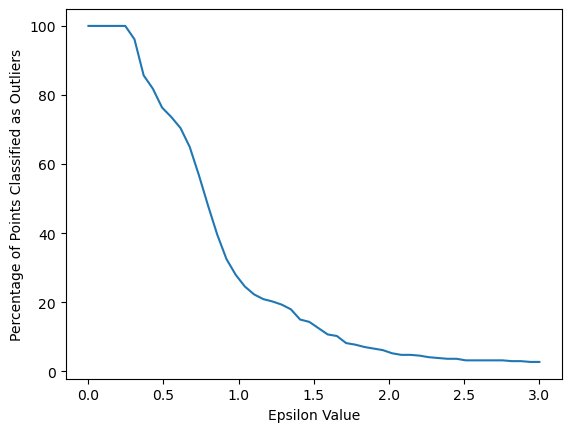

In [18]:
# Line plot
sns.lineplot(x=np.linspace(0.001, 3, 50), y=outlier_percent)
plt.ylabel("Percentage of Points Classified as Outliers")
plt.xlabel("Epsilon Value");

## DBSCAN with Chosen Epsilon

**Based on the plot created in the previous task, retrain a DBSCAN model with a reasonable epsilon value. Note: For reference, use eps=2.**

In [19]:
dbscan = DBSCAN(eps=2, min_samples=scaled_X.shape[1])

In [20]:
dbscan.fit(scaled_X)

DBSCAN(eps=2, min_samples=8)

**Create a scatterplot of Milk vs Grocery, colored by the discovered labels of the DBSCAN model.**

In [21]:
# Let's see the labels
dbscan.labels_

array([ 0,  0,  0,  1,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  1,  0,
        1,  0,  1,  0,  1,  1, -1,  0,  0,  1,  1,  0,  1,  1,  1,  1,  1,
        1,  0,  1,  0,  0,  1,  1,  1,  0,  0,  0,  0,  0, -1,  0,  0,  1,
        1,  0,  0,  1,  1,  0,  0,  1,  1,  0, -1,  0,  0,  1, -1,  1,  0,
        1,  1,  1, -1,  1,  0,  0,  1,  1,  0,  1,  1,  1,  0,  0,  1,  0,
       -1, -1, -1,  1,  1,  1,  1, -1, -1,  0,  1,  0,  1,  1,  1,  0,  0,
        0,  1,  1,  1,  0,  0,  0,  0,  1,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  0,  1, -1,  1,  0,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  0,  0,  1,  0,  0,  0,  1,  1,  0,  0,  0,  0,  1,  1,  1,
        0,  0,  1,  0,  1,  0,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1,
        1,  0,  0,  1,  1,  1,  0,  1,  1,  1,  0,  1,  1,  0,  0,  1,  1,
        1,  0,  1,  0,  1,  0,  1, -1,  1,  1,  0,  1,  0,  1,  0,  1,  1,
        1,  1,  0,  1,  1

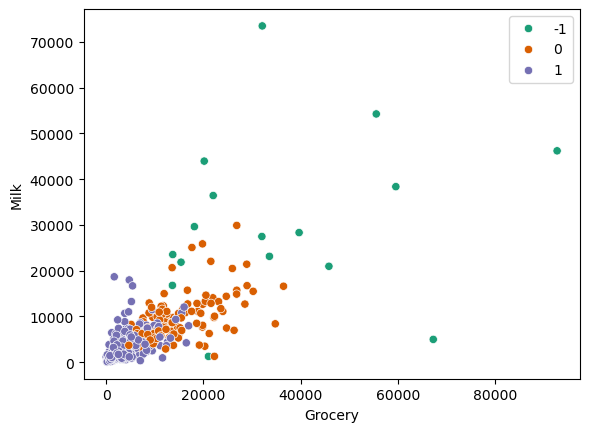

In [22]:
sns.scatterplot(df, x="Grocery", y="Milk", hue=dbscan.labels_, palette="Dark2");

<div class="alert alert-warning alert-info">
    
<span style=" color:#bf2e98"> 

**Note:** Green points detected as outliers. So, the cluster "-1" represents outliers.
</span>

**Create a scatterplot of Milk vs. Detergents Paper colored by the labels.**

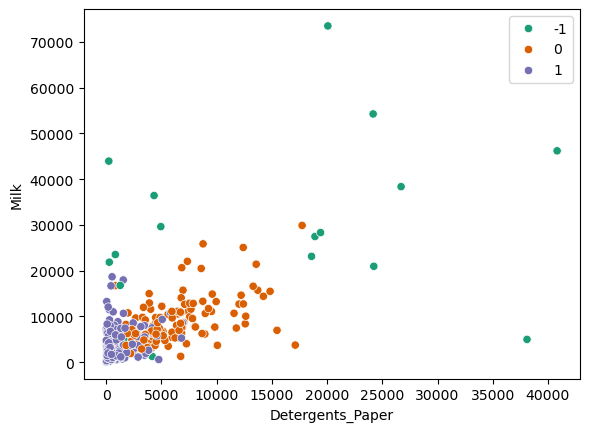

In [23]:
sns.scatterplot(df, x="Detergents_Paper", y="Milk", hue=dbscan.labels_, palette="Dark2");

**Create a new column on the original dataframe called "Labels" consisting of the DBSCAN labels.**

In [24]:
# Add labels colum to the df 
df["Labels"] = dbscan.labels_

# It fits to dataframe because there is no test/train set 

In [25]:
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Labels
0,2,3,12669,9656,7561,214,2674,1338,0
1,2,3,7057,9810,9568,1762,3293,1776,0
2,2,3,6353,8808,7684,2405,3516,7844,0
3,1,3,13265,1196,4221,6404,507,1788,1
4,2,3,22615,5410,7198,3915,1777,5185,0
...,...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204,1
436,1,3,39228,1431,764,4510,93,2346,1
437,2,3,14531,15488,30243,437,14841,1867,0
438,1,3,10290,1981,2232,1038,168,2125,1


**Compare the statistical mean of the clusters and outliers for the spending amounts on the categories.**

In [26]:
# drop the Region and Channel columns first (these columns are categorical)
cats= df.drop(["Channel", "Region"], axis=1)

cat_means = cats.groupby("Labels").mean()

In [27]:
cat_means

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Labels,,,,,,
-1,28678.285714,24176.523810,28797.857143,11535.000000,11932.523810,7367.380952
0,8134.862595,8909.916031,14004.427481,1450.595420,6080.832061,1533.519084
1,12542.430556,3039.760417,3677.871528,3192.315972,766.267361,1094.920139


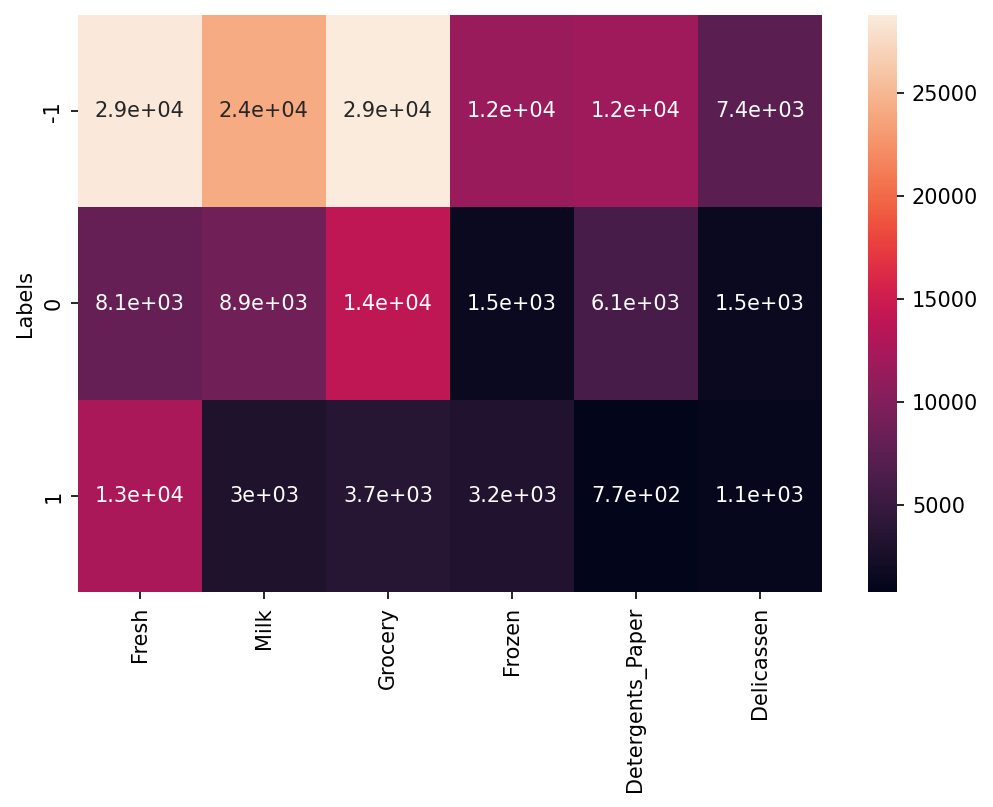

In [40]:
plt.figure(figsize=(8,5), dpi=150)
sns.heatmap(cat_means, annot=True);

<div class="alert alert-warning alert-info">
    
<span style=" color:#bf2e98"> 

**Insight:** Outliers category (-1 label) shows that there is extreme spending in Fresh, Milk and Grocery compared to others (see light colors on heatmap).
</span>

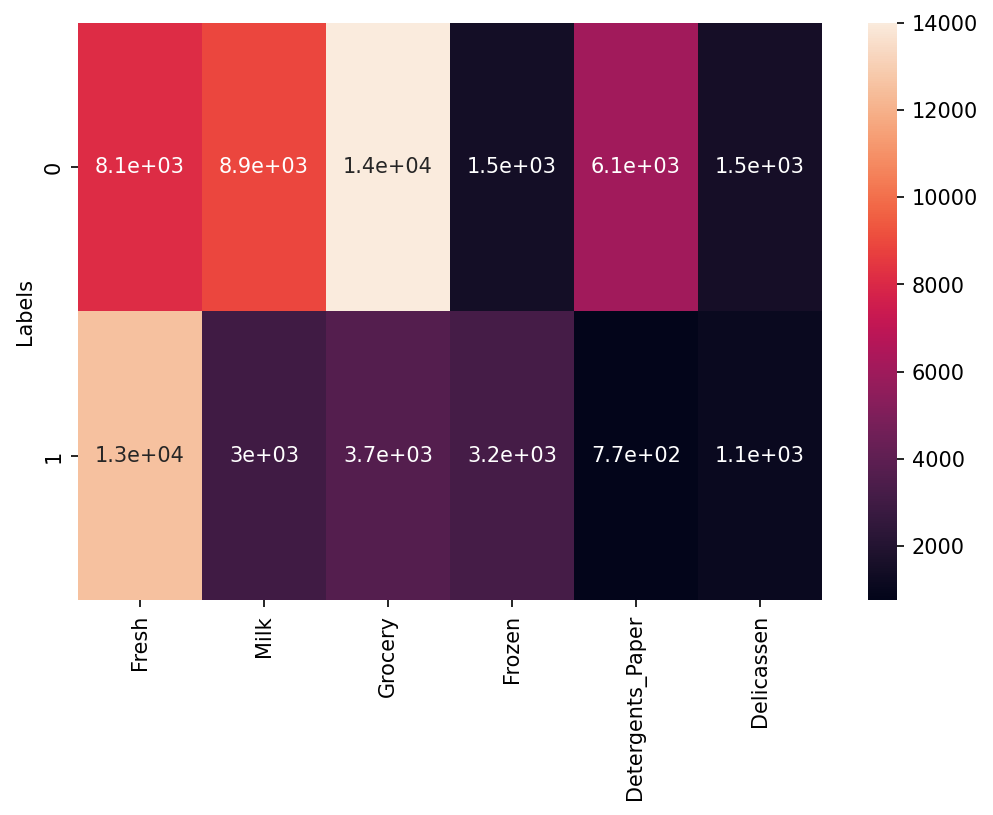

In [39]:
# Let's take a look at 0 and 1 clusters on the heatmap

plt.figure(figsize=(8,5), dpi=150)
sns.heatmap(cat_means.loc[[0,1]], annot=True);

<div class="alert alert-warning alert-info">
    
<span style=" color:#bf2e98"> 

**Insight:** When we compare cluster 0 and 1, we can see that Cluster 0 spends more in Grocery category and Cluster 1 spends more in Fresh.
</span>

**Normalize the dataframe from the previous task using MinMaxScaler so the spending means go from 0-1 and create a heatmap of the values.**

In [42]:
from sklearn.preprocessing import MinMaxScaler

In [43]:
scaler = MinMaxScaler()
data = scaler.fit_transform(cat_means)
scaled_means = pd.DataFrame(data,cat_means.index,cat_means.columns)

In [44]:
scaled_means

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Labels,,,,,,
-1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
0,0.000000,0.277723,0.411089,0.000000,0.475949,0.069925
1,0.214549,0.000000,0.000000,0.172714,0.000000,0.000000


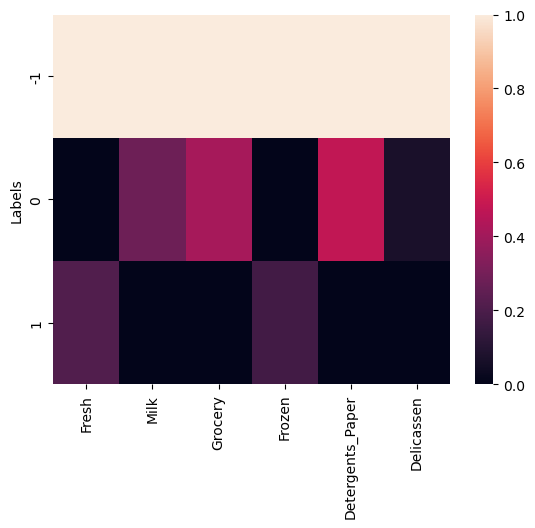

In [48]:
sns.heatmap(scaled_means);

**Create another heatmap similar to the one above, but with the outliers removed**

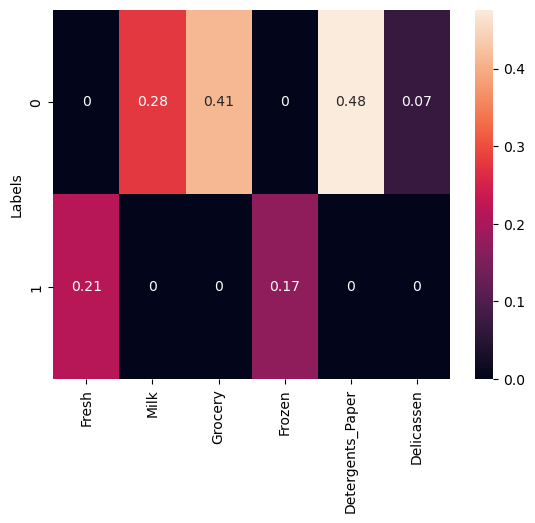

In [47]:
sns.heatmap(scaled_means.loc[[0,1]],annot=True);

**What spending category makes different compared to the two clusters?**

<div class="alert alert-warning alert-info">
    
<span style=" color:#bf2e98"> 

**Answer:** According to the heatmap, "Detergents Paper" has the most significant difference.
</span>